# Part 1: Column Space of a Matrix

Definition: the *column space* of a matrix is the set of all linear combinations of that matrix's columns.

In [1]:
import numpy as np
A = np.array([
    [1,100],
    [2,10],
    [3,0]
])
B = np.array([
    [1,0],
    [0,2],
    [0,3],
    [0,0]
])

$A = \begin{bmatrix}
1&100\\
2&10\\
3&0\\
\end{bmatrix}$

In [2]:
A @ np.array([-1, 100]).reshape(-1, 1)

array([[9999],
       [ 998],
       [  -3]])

In [3]:
A @ np.array([0, 0]).reshape(-1, 1)

# definition: column space of A is whatever A@c gives us, for any c we choose

array([[0],
       [0],
       [0]])

What vectors are in the column space of B?

$B = \begin{bmatrix}
1&0\\
0&2\\
0&3\\
0&0\\
\end{bmatrix}$

$a=\begin{bmatrix}
2\\
2\\
3\\
0
\end{bmatrix}, b=\begin{bmatrix}
0\\
0\\
0\\
1
\end{bmatrix}, c=\begin{bmatrix}
-10\\
0\\
0\\
0
\end{bmatrix}, d=\begin{bmatrix}
0\\
-2\\
3\\
0
\end{bmatrix}, e=\begin{bmatrix}
-1\\
2\\
3\\
0
\end{bmatrix}$

In [4]:
# in the column space of B: a, e, c
# not in the column space: b, d
c = np.array([-10, 0]).reshape(-1,1) # coef
B @ c

array([[-10],
       [  0],
       [  0],
       [  0]])

# Part 2: When can we solve for c?

Suppose $Xc = y$.

$X$ and $y$ are known, and we want to solve for $c$.

When does `c = np.linalg.solve(X, y)` work?

## Fruit Sales Example

### Data

* `10 apples and 0 bananas sold for $7`
* `2 apples and 8 bananas sold for $5`
* `4 apples and 4 bananas sold for $5`

### Equations

* `10*apple + basket == 7`
* `2*apple + 8*banana + basket == 5`
* `4*apple + 4*banana + basket == 5`

### Matrix

In [5]:
import numpy as np

X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
])
y = np.array([7,5,5]).reshape(-1,1)

c = np.linalg.solve(X, y)
c

array([[0.5 ],
       [0.25],
       [2.  ]])

In [6]:
[30, 20, 1] @ c # prediction

array([22.])

In [7]:
[4,4,1] @ c # consistent with earlier data

array([5.])

In [8]:
# why it fails: numpy has limitations (reason 1)
import numpy as np

X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
    [4,4,1],
])
y = np.array([7,5,5,5]).reshape(-1,1)

# numpy insists equal number of equations and variables, even in rare cases where that's not necessary
#c = np.linalg.solve(X, y)
#c

In [9]:
# clearly c is a solution even if solve can't find it
c = np.array([[0.5 ],
              [0.25],
              [2.  ]])
X @ c

array([[7.],
       [5.],
       [5.],
       [5.]])

In [10]:
# why it fails: mathematical impossibility (reason 2)
import numpy as np

X = np.array([
    [10,0,1],
    [4,4,1],
    [4,4,1],
    [10,0,2],
])
y = np.array([7,5,5.1,8]).reshape(-1,1)

# numpy is telling that there's a contradition in the math
#c = np.linalg.solve(X, y)
#c

### Equivalent Statements

* there's a solution for the system of equations
* there's a solution for $c$ (in $Xc = y$), even if `np.linalg.solve` can't find it
* $y$ is in the column space of $X$

In [11]:
X.T @ X

array([[232,  32,  38],
       [ 32,  32,   8],
       [ 38,   8,   7]])

# The Problem with Most Tables

More rows than columns in our dataset means more equations than variables.

This *usually* means that:

The equations aren't solvable, and y isn't in the column space of X.

In [12]:
np.linalg.solve(X.T@X, X.T@y)

array([[0.6   ],
       [0.4125],
       [1.    ]])

# Part 3: Projection Matrix

$P = X(X^TX)^{-1}X^T$

$P$ is a projection matrix: if you multiply a vector by $P$, you get back another vector of the same size, with two properties:

1. it will be in the column space of $X$
2. the new vector will be as "close as possible" to the original vector

Say there's no solution for $Xc=y$.

Solve $Xc=p$ instead, where $p=Py$.

## Fruit Sales Example

In [13]:
import numpy as np
import pandas as pd

X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
    [10,4,1],
    [10,4,1]
])
y = np.array([7,5,5,8,8.5]).reshape(-1,1)
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

$P = X(X^TX)^{-1}X^T$

In [14]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[ 0.75      , -0.25      ,  0.33333333,  0.08333333,  0.08333333],
       [-0.25      ,  0.75      ,  0.33333333,  0.08333333,  0.08333333],
       [ 0.33333333,  0.33333333,  0.55555556, -0.11111111, -0.11111111],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222]])

In [15]:
p = P @ y # why?  Xc = p is solvable

In [16]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [10,  4,  1],
       [10,  4,  1]])

In [17]:
p

array([[7.04166667],
       [5.04166667],
       [4.94444444],
       [8.23611111],
       [8.23611111]])

In [18]:
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

## Scatter Example

In [19]:
import pandas as pd
x = np.random.normal(5, 2, size=(10,1))
y = 2*x + np.random.normal(size=x.shape)
df = pd.DataFrame({"x":x.reshape(-1), "y":y.reshape(-1)})
df

,x,y
0,5.604437,10.843775
1,6.031674,14.053653
2,-0.268715,-0.609640
3,2.881881,7.283258
4,2.122426,3.331448
5,7.609872,12.725954
6,6.287303,13.644386
7,9.311422,19.397812
8,4.585034,8.428537
9,6.136429,13.843206


<AxesSubplot:xlabel='x', ylabel='y'>

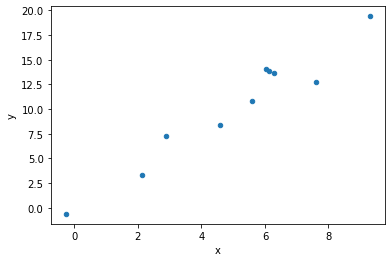

In [20]:
df.plot.scatter(x="x", y="y")

In [21]:
X = df[["x"]].values

In [22]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[ 9.70951348e-02,  1.04496889e-01, -4.65539725e-03,
         4.99277023e-02,  3.67703797e-02,  1.31838691e-01,
         1.08925593e-01,  1.61317516e-01,  7.94343032e-02,
         1.06311739e-01],
       [ 1.04496889e-01,  1.12462894e-01, -5.01028741e-03,
         5.37337900e-02,  3.95734586e-02,  1.41889016e-01,
         1.17229207e-01,  1.73615070e-01,  8.54897375e-02,
         1.14416093e-01],
       [-4.65539725e-03, -5.01028741e-03,  2.23211221e-04,
        -2.39387163e-03, -1.76302062e-03, -6.32123826e-03,
        -5.22262941e-03, -7.73465246e-03, -3.80861758e-03,
        -5.09730358e-03],
       [ 4.99277023e-02,  5.37337900e-02, -2.39387163e-03,
         2.56735362e-02,  1.89078534e-02,  6.77933342e-02,
         5.60110925e-02,  8.29517664e-02,  4.08462510e-02,
         5.46670116e-02],
       [ 3.67703797e-02,  3.95734586e-02, -1.76302062e-03,
         1.89078534e-02,  1.39251141e-02,  4.99279263e-02,
         4.12506293e-02,  6.10916947e-02,  3.00821406e-02,
         4.

In [23]:
p = P @ y
p

array([[11.44482698],
       [12.31728881],
       [-0.54874239],
       [ 5.88509317],
       [ 4.33420928],
       [15.54012991],
       [12.8393103 ],
       [19.01486689],
       [ 9.36310412],
       [12.53120932]])

In [24]:
df["p"] = p
df

,x,y,p
0,5.604437,10.843775,11.444827
1,6.031674,14.053653,12.317289
2,-0.268715,-0.609640,-0.548742
3,2.881881,7.283258,5.885093
4,2.122426,3.331448,4.334209
5,7.609872,12.725954,15.540130
6,6.287303,13.644386,12.839310
7,9.311422,19.397812,19.014867
8,4.585034,8.428537,9.363104
9,6.136429,13.843206,12.531209


<AxesSubplot:xlabel='x', ylabel='p'>

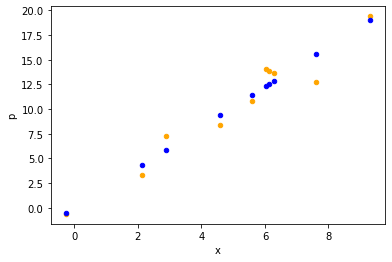

In [25]:
ax = df.plot.scatter(x="x", y="y", c="orange")
df.plot.scatter(x="x", y="p", c="blue", ax=ax)

In [26]:
# are two columns close?  What is the distance?

df2 = pd.DataFrame({
    "v1": [1, 1],
    "v2": [4, 5],
}, index=["x", "y"])
df2

,v1,v2
x,1,4
y,1,5


In [27]:
((df2["v1"] - df2["v2"]) ** 2).sum() ** 0.5

5.0

In [30]:
# what is the distance between p and y? (euclidian distance)
((df["y"] - df["p"]) ** 2).sum() ** 0.5

4.201125910286706

In [ ]:
# when I have p = P@y, we minimize the euclidian distance between p and y

In [45]:
class LinReg:
    def fit(self, X, y):
        X = X.values # df => array
        y = y.values.reshape(-1,1) # series => array
        c = np.linalg.solve(X.T@X, X.T@y)
        self.coef_ = c
        
    def predict(self, X):
        return X @ self.coef_

model = LinReg()
model.fit(df[["x"]], df["y"])
model.predict(df[["x"]])

,0
0,11.444827
1,12.317289
2,-0.548742
3,5.885093
4,4.334209
5,15.540130
6,12.839310
7,19.014867
8,9.363104
9,12.531209
